# Exploratory data analysis


### Playlist Dynamics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

Settings for getting figures in high resolution

In [2]:
# sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
# sns.set_context('notebook')
# sns.set_style("ticks")

In [3]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


Take a look into the global playlist and make sense of why we have so many songs in it. Assumption is that each playlist should only have 200 songs in it.

In [4]:
christmas_songs = df[((df['album'].str.contains('christ', case=False)) |
                      (df['title'].str.contains('christ', case=False))
                      ) &
                     (df['country'] == 'Global')
                     ].sort_values(by=['popularity'], ascending=False)['uri'][:5]


Check multiple songs based on the example of the song sleigh ride.

In [24]:
df[(df['country'] == 'Global') & (df['title'] == 'sleigh ride')]

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
15215,Global,https://open.spotify.com/track/4ukUoXLuFzMixyZ...,200.15,sleigh ride,Ella Fitzgerald,album,adult standards,1766898.0,False,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,5,18,0.508,0.287,1,-12.472,1,0.0523,0.764,0.000000,0.1530,0.644,154.759,4,pop,22224.0,0.0,1,0,79,0.0,0.0,global,2.933117,1960,1,1
16619,Global,https://open.spotify.com/track/597IVBYr60vm0HK...,248.55,sleigh ride,Carpenters,album,adult standards,1562181.0,False,Christmas Portrait (Special Edition),1978,5,21,0.694,0.243,11,-15.632,1,0.0723,0.871,0.000000,0.1650,0.578,100.774,4,pop,15115.0,False,1,0,90,0.0,0.0,global,2.657333,1978,1,1
38848,Global,https://open.spotify.com/track/6XAdcAseYtijN0Q...,76.00,sleigh ride,Johnny Mathis,album,adult standards,243064.0,False,Merry Christmas,1958-10-06,3,12,0.605,0.663,1,-8.949,1,0.0274,0.699,0.000000,0.1210,0.893,103.180,4,pop,22676.0,0.0,1,0,132,0.0,0.0,global,2.978667,1958,10,6
46766,Global,https://open.spotify.com/track/1ODZGydlown4Ves...,2169.35,sleigh ride,The Ronettes,album,brill building pop,153854.0,False,NOW 100 Hits Christmas,2019-11-08,9,100,0.527,0.768,2,-7.557,1,0.0304,0.457,0.000002,0.3040,0.799,91.750,4,pop,372.0,1.0,1,0,23,0.0,1.0,global,3.013883,2019,11,8
49133,Global,https://open.spotify.com/track/5ymVfeMK8cDew5v...,76.00,sleigh ride,Andy Williams,album,adult standards,315467.0,False,Merry Christmas,1965,1,12,0.571,0.634,5,-9.155,0,0.0537,0.724,0.000000,0.0864,0.805,109.575,4,pop,19863.0,False,1,0,138,0.0,0.0,global,2.140000,1965,1,1
76936,Global,https://open.spotify.com/track/5ASM6Qjiav2xPe7...,1368.15,sleigh ride,The Ronettes,compilation,brill building pop,153854.0,False,A Christmas Gift For You From Phil Spector,1963,5,13,0.529,0.772,2,-7.013,1,0.0287,0.403,0.000002,0.3160,0.853,91.751,4,pop,20594.0,False,1,0,20,0.0,1.0,global,3.021117,1963,1,1


### Dynamics of songs from full database

In [5]:
df_db = pd.read_pickle('.\dataset_\original_db.pkl')
df_db.head(10)

,Unnamed: 0,country,date,position,uri,track,title,artist,position_7day_ave
0,0,Global,2020-11-05,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",dakiti,"Bad Bunny, Jhay Cortez",3.0
1,1,Global,2020-11-05,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande,4.0
2,2,Global,2020-11-05,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",mood,24kGoldn,5.0
3,3,Global,2020-11-05,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",lemonade,Internet Money,6.0
4,4,Global,2020-11-05,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",lonely,Justin Bieber,7.0
5,5,Global,2020-11-05,6.0,https://open.spotify.com/track/1tkg4EHVoqnhR6i...,"What You Know Bout Love , Pop Smoke",what you know bout love,Pop Smoke,8.0
6,6,Global,2020-11-05,7.0,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",dynamite,BTS,9.0
7,7,Global,2020-11-05,8.0,https://open.spotify.com/track/1yoMvmasuxZfqHE...,"Hawái , Maluma",hawái,Maluma,10.0
8,8,Global,2020-11-05,9.0,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,"34+35 , Ariana Grande",34+35,Ariana Grande,11.0
9,9,Global,2020-11-05,10.0,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,"WAP , Cardi B",wap,Cardi B,12.0


In [35]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807001 entries, 0 to 9807000
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     object 
 2   date        object 
 3   position    float64
 4   uri         object 
 5   track       object 
 6   title       object 
 7   artist      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 598.6+ MB


Now lets take a a look and compare the same top5 christas songs.

In [6]:
df_global_christmas = df_db[(df_db['country'] == 'Global') & (df_db['uri'].isin(list(christmas_songs)))]
df_denmark_christmas = df_db[(df_db['country'] == 'Denmark') & (df_db['uri'].isin(list(christmas_songs)))]
df_usa_christmas = df_db[(df_db['country'] == 'USA') & (df_db['uri'].isin(list(christmas_songs)))]
df_france_christmas = df_db[(df_db['country'] == 'France') & (df_db['uri'].isin(list(christmas_songs)))]

# Some christians inside the country
df_indonesia_christmas = df_db[(df_db['country'] == 'Indonesia') & (df_db['uri'].isin(list(christmas_songs)))]

# Celebrate Christas but still low numbers
df_mexico_christmas = df_db[(df_db['country'] == 'Mexico') & (df_db['uri'].isin(list(christmas_songs)))]
df_peru_christmas = df_db[(df_db['country'] == 'Peru') & (df_db['uri'].isin(list(christmas_songs)))]
df_brazil_christmas = df_db[(df_db['country'] == 'Brazil') & (df_db['uri'].isin(list(christmas_songs)))]
df_ecuador_christmas = df_db[(df_db['country'] == 'Ecuador') & (df_db['uri'].isin(list(christmas_songs)))]
df_costa_rica_christmas = df_db[(df_db['country'] == 'Costa Rica') & (df_db['uri'].isin(list(christmas_songs)))]
# No or Commercial celebration
df_taiwan_christmas = df_db[(df_db['country'] == 'Taiwan') & (df_db['uri'].isin(list(christmas_songs)))]
df_malaysia_christmas = df_db[(df_db['country'] == 'Malaysia') & (df_db['uri'].isin(list(christmas_songs)))]
df_turkey_christmas = df_db[(df_db['country'] == 'Turkey') & (df_db['uri'].isin(list(christmas_songs)))]


In [7]:
# Check for other christmas songs not in english
df_global_year = df_db[(df_db['country'] == 'Global') & 
                       (df_db['date'] > "2018-10-01") &
                       (df_db['date'] < "2019-02-01") & 
                       (df_db['uri'].isin(list(christmas_songs)))
                       ]


In [45]:
df_db['country'].unique()

array(['Global', 'USA', 'UK', 'Argentina', 'Austria', 'Australia',
       'Belgium', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Colombia',
       'Costa Rica', 'Germany', 'Denmark', 'Ecuador', 'Spain', 'Finland',
       'France', 'Indonesia', 'Ireland', 'Italy', 'Mexico', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Sweden', 'Singapore', 'Turkey', 'Taiwan',
       nan], dtype=object)

[(array(17836.), array(17897.))]

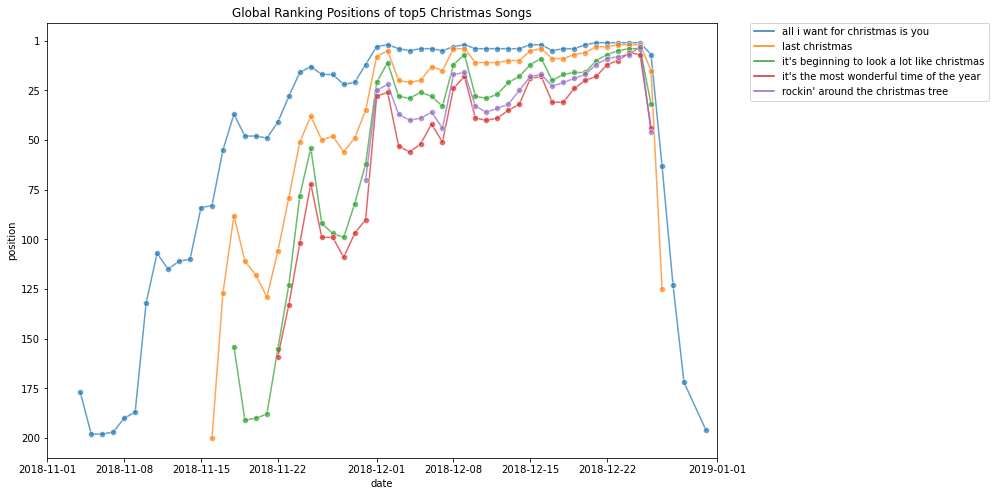

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='date', y='position',
                  data=df_global_year, hue='title', marker="o", alpha=0.7)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100','125', '150', '175', '200'])
ax.set(title='Global Ranking Positions of top5 Christmas Songs')
ax.set(xlim=('2018-11', '2019-01'))


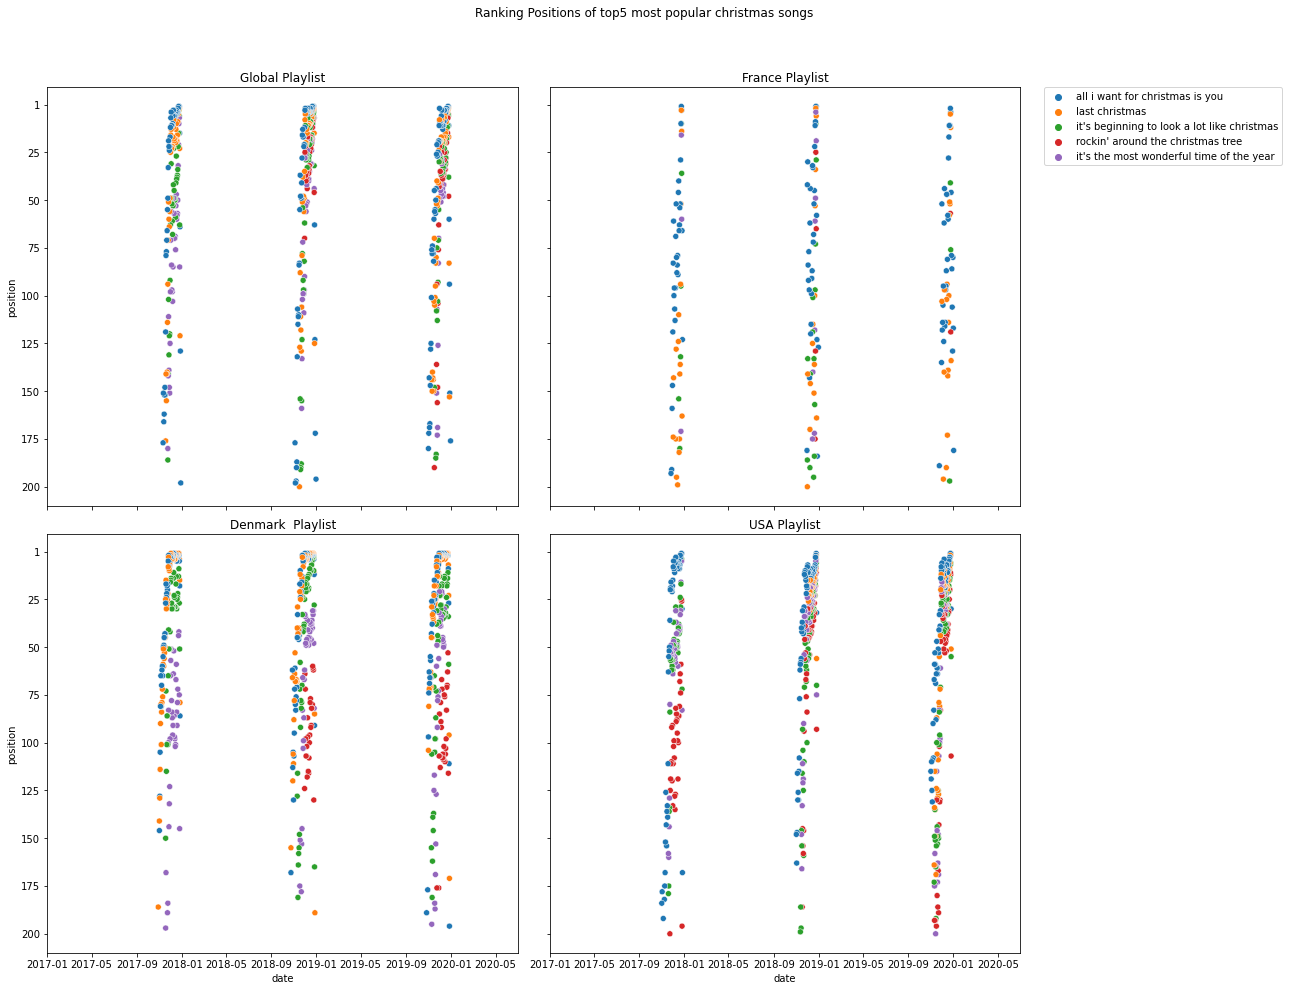

In [12]:
f, ax = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)

sns.scatterplot(x='date', y='position', data=df_global_christmas,
                hue='title', ax=ax[0, 0])
ax[0, 0].invert_yaxis()
ax[0, 0].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 0].set_title('Global Playlist')
ax[0, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_denmark_christmas, 
                hue='title', ax=ax[1, 0])
ax[1, 0].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[1, 0].set_title('Denmark  Playlist')
ax[1, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_usa_christmas,
                hue='title', ax=ax[1, 1])
ax[1, 1].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[1, 1].set_title('USA Playlist')
ax[1, 1].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_france_christmas,
                hue='title', ax=ax[0, 1])
ax[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[0, 1].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 1].set_title('France Playlist')
ax[0, 1].set(xlim=('2017-01', '2020-07'))

ax[0, 0].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
f.suptitle('Ranking Positions of top5 most popular christmas songs')
f.tight_layout()
f.subplots_adjust(top=0.90)

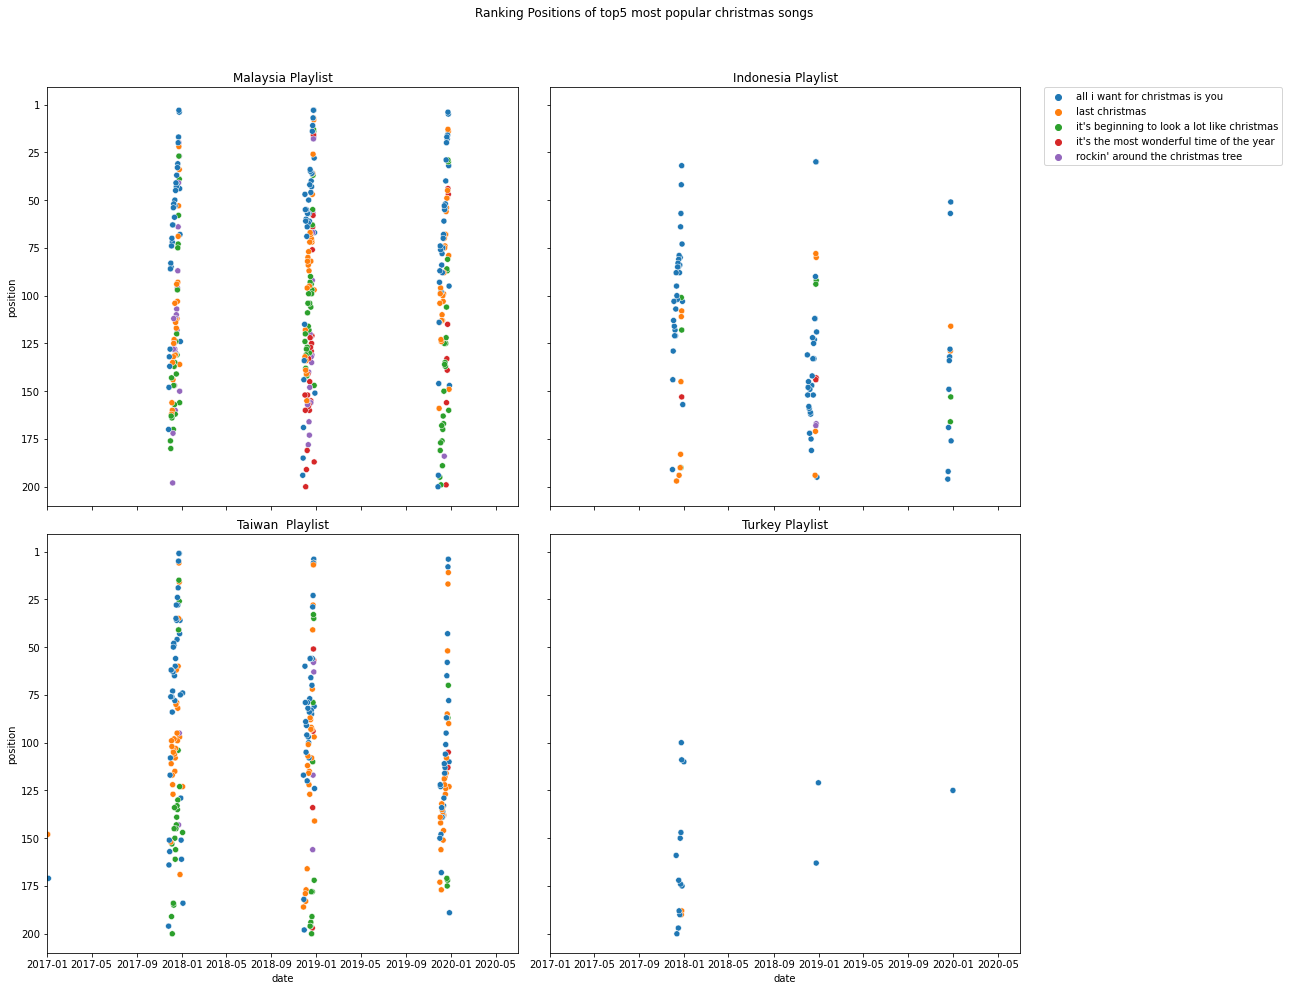

In [14]:
f, ax = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)

sns.scatterplot(x='date', y='position', data=df_malaysia_christmas,
                hue='title', ax=ax[0, 0])
ax[0, 0].invert_yaxis()
ax[0, 0].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 0].set_title('Malaysia Playlist')
ax[0, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_taiwan_christmas, 
                hue='title', ax=ax[1, 0])
ax[1, 0].set_yticklabels(['', '1', '25', '50', '75', '100','125', '150', '175', '200'])
ax[1, 0].set_title('Taiwan  Playlist')
ax[1, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_turkey_christmas,
                hue='title', ax=ax[1, 1])
ax[1, 1].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[1, 1].set_title('Turkey Playlist')
ax[1, 1].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_indonesia_christmas,
                hue='title', ax=ax[0, 1])
ax[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[0, 1].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 1].set_title('Indonesia Playlist')
ax[0, 1].set(xlim=('2017-01', '2020-07'))

ax[0, 0].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
f.suptitle('Ranking Positions of top5 most popular christmas songs')
f.tight_layout()
f.subplots_adjust(top=0.90)

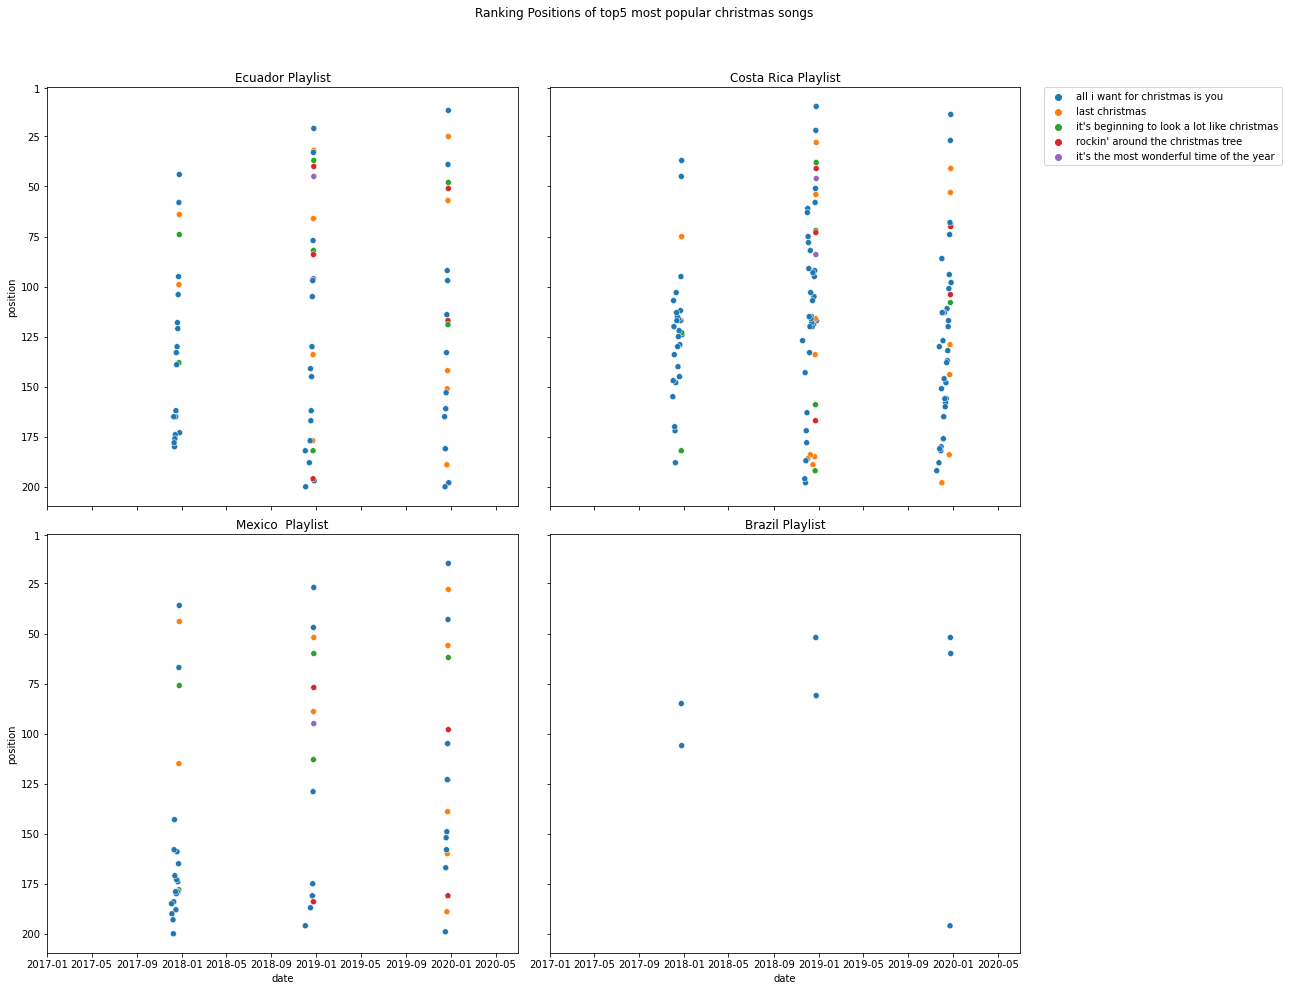

In [37]:
f, ax = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)

sns.scatterplot(x='date', y='position', data=df_ecuador_christmas,
                hue='title', ax=ax[0, 0])
ax[0, 0].invert_yaxis()
ax[0, 0].set_yticks([1] + list(range(25, 225, 25)))
ax[0, 0].set_yticklabels(['1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 0].set_title('Ecuador Playlist')
ax[0, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_mexico_christmas,
                hue='title', ax=ax[1, 0])
ax[1, 0].set_yticklabels([ '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[1, 0].set_title('Mexico  Playlist')
ax[1, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_brazil_christmas,
                hue='title', ax=ax[1, 1])
ax[1, 1].set_yticklabels(['1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[1, 1].set_title('Brazil Playlist')
ax[1, 1].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_costa_rica_christmas,
                hue='title', ax=ax[0, 1])
ax[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[0, 1].set_yticklabels(['1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 1].set_title('Costa Rica Playlist')
ax[0, 1].set(xlim=('2017-01', '2020-07'))

ax[0, 0].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
f.suptitle('Ranking Positions of top5 most popular christmas songs')
f.tight_layout()
f.subplots_adjust(top=0.90)
